<a href="https://colab.research.google.com/github/adelardw/Gradient-descent.Linear-regression/blob/main/ML_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import sklearn.linear_model
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error as msee



In [220]:
"""
This is a numerical algorithm which calculating coeficients in linear regression
"""


""" Define Loss_function"""

def loss(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  return ((y_true - y_pred) ** 2).sum() / len(y_true)


def loss_grad(w, x:list, y:list, n_samples: int, m_features: int):

  grad = -2*x.T @ (y - (np.dot(x,w)))
  return grad


def GD(x:list, y:list, lr = 0.001, epochs = 500):
  m_features = len(x.T)
  n_samples = len(y)
  new_x = np.hstack(
      (np.ones(n_samples).reshape(-1,1),x)
      )
  
  w = np.zeros(m_features + 1)         
  mse_history = [loss(y,(np.dot(w,new_x.T) ))]                     
  epoch = 0
  while epoch < epochs:
    w = w - lr*loss_grad(w, new_x, y, n_samples,m_features)
    y_predict = np.dot(w,new_x.T)
    mse = loss(y, y_predict)
    mse_history.append(mse)
    epoch += 1
  
  return (w[1:],w[0]), mse_history






In [221]:
x1, y1 = make_regression(n_samples=790, n_features=20, noise=20, random_state=44)


GD(x1, y1,lr = 0.0001,epochs = 1000)[0]



(array([ 8.30703736e+01, -1.18238862e+00, -1.98454370e-01,  4.83737432e+01,
         9.50530743e+01, -6.95049233e-01, -6.60621810e-02,  6.62687293e+01,
         9.82957312e+01,  3.60061009e+01,  5.11687625e-01,  5.98670651e-02,
         9.91788140e-02,  9.28914935e+01,  4.49866503e+00,  6.79154964e+01,
         1.41835238e-01,  9.62219753e+01,  9.00425419e-01,  1.74195034e-01]),
 0.03762023922860804)

In [ ]:
""" Sklearn LinearModel() """
linreg = LinearRegression()
linreg.fit(x1, y1)
linreg.coef_, linreg.intercept_

In [223]:
""" Data spliting """

X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.2, random_state = 42)

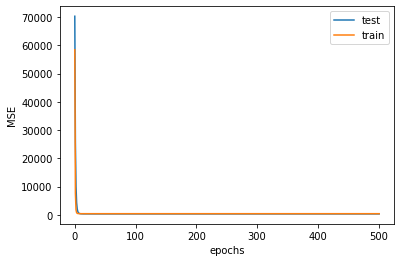

In [224]:
""" MSE plot"""

epoches_test = np.linspace(0,len(GD(X_test,y_test)[1]),len(GD(X_test,y_test)[1]))
epoches_train = np.linspace(0,len(GD(X_train,y_train)[1]),len(GD(X_train,y_train)[1]))

plt.plot(epoches_test,GD(X_test,y_test)[1], label = 'test')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.plot(epoches_train,GD(X_train,y_train)[1], label = 'train')
plt.legend()


In [225]:
# For kaggle datasets
# You should downoload kaggle.json from your kaggle account

! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# signature for datasets: ! kaggle datasets download <name-of-dataset>
# copy all after https://www.kaggle.com/ 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [226]:
! kaggle datasets download "sohier/calcofi"
from  zipfile import ZipFile as zf

with zf('/content/calcofi.zip') as myzip:
    df_bottle = pd.read_csv(myzip.open('bottle.csv','r'))
    df_cast = pd.read_csv(myzip.open('cast.csv','r'))  



calcofi.zip: Skipping, found more recently modified local copy (use --force to force download)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [12]:
df_bottle.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               864863 non-null  float64
 6   Salnty               864863 non-null  float64
 7   O2ml_L               864863 non-null  float64
 8   STheta               864863 non-null  float64
 9   O2Sat                864863 non-null  float64
 10  Oxy_µmol/Kg          864863 non-null  float64
 11  BtlNum               864863 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               864863 non-null  float64
 14  T_qual               864863 non-null  float64
 15  S_prec           

In [13]:
df_cast.head().corr()['Cruz_Sta'].dropna()

Cst_Cnt       -0.944844
Cruz_Sta       1.000000
DbSta_ID       1.000000
Julian_Date   -0.872868
Julian_Day    -0.872868
Lat_Dec        0.983010
Lat_Min        0.983010
Lon_Dec        0.979138
Lon_Deg        0.944844
Lon_Min       -0.434047
Rpt_Line       1.000000
St_Line        1.000000
Ac_Line        0.977746
Rpt_Sta       -0.980568
St_Station    -0.980568
Ac_Sta        -0.979544
Event_Num     -0.944844
Wind_Dir      -0.095054
Wind_Spd       0.488400
Wea           -0.484724
Name: Cruz_Sta, dtype: float64

In [14]:
clmns_cast = df_cast.head().corr()['Cruz_Sta'].dropna().index.to_numpy()
clmns_cast

array(['Cst_Cnt', 'Cruz_Sta', 'DbSta_ID', 'Julian_Date', 'Julian_Day',
       'Lat_Dec', 'Lat_Min', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta',
       'Event_Num', 'Wind_Dir', 'Wind_Spd', 'Wea'], dtype=object)

In [90]:
df_bottle.head().corr()['Btl_Cnt'].dropna()

Btl_Cnt       1.000000
Depthm        0.972178
T_degC       -0.838742
Salnty       -0.897958
STheta       -0.654280
RecInd        0.577350
T_prec        0.707107
S_prec        0.577350
R_Depth       0.972178
R_TEMP       -0.838742
R_POTEMP     -0.838742
R_SALINITY   -0.897958
R_SIGMA      -0.288675
R_SVA         0.784092
R_DYNHT       0.972272
R_PRES        0.972178
Name: Btl_Cnt, dtype: float64

In [16]:
clmns_bottle = df_bottle.head().corr()['Btl_Cnt'].dropna().index.to_numpy()
clmns_bottle

array(['Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'STheta', 'RecInd',
       'T_prec', 'S_prec', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'], dtype=object)

In [218]:
""" LinearRegression on kaglle datasets"""
""" dropna() - use for Series to drop Nan values, fillna(0) -  Series/DF method that convert NaN to 0 """


y_cast = df_cast['Cruz_Sta'].fillna(0).to_numpy()
x_cast = df_cast[clmns_cast].fillna(0).to_numpy()

y_bottle = df_bottle['Btl_Cnt'].fillna(0).to_numpy()
x_bottle = df_bottle[clmns_bottle].fillna(0).to_numpy()


linregr_cast = LinearRegression().fit(x_cast,y_cast)
linregr_bottle= LinearRegression().fit(x_bottle,y_bottle)

linregr_cast.coef_, linregr_cast.intercept_

linregr_bottle.coef_, linregr_bottle.intercept_


Xc_train,Xc_test, yc_train, yc_test = train_test_split(x_cast,y_cast, test_size = 0.2, random_state = 42)
Xb_train,Xb_test, yb_train, yb_test = train_test_split(x_bottle,y_bottle, test_size = 0.2, random_state = 42)


#Xc_norm = normalize(Xc_train)
#yc_norm = normalize(yc_train.reshape(-1,1),axis = 0)
lrc = LinearRegression().fit(Xc_train,yc_train)
lrb = LinearRegression().fit(Xb_train,yb_train)

yc_predict = lrc.predict(Xc_test)
yb_predict = lrb.predict(Xb_test)

# Mean squred error

msee(yc_test,yc_predict),msee(yb_test,yb_predict)



(0.00152587890625, 5.625608388758085e-21)